In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gnd = pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")
df = gnd.copy()
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


This data set contains 7 numeric variables and 1 categorical variable.Dependent variable is gender, others are independent variable.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


Let's examine the variables now. I'll loop for it

In [6]:
def numeric(variable):
    
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution of the variable".format(variable))
    plt.show()

In [7]:
list = ["long_hair","forehead_width_cm","forehead_height_cm","nose_wide",
        "nose_long","lips_thin","distance_nose_to_lip_long"]

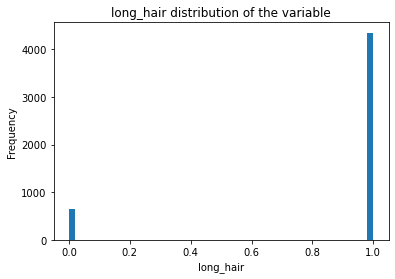

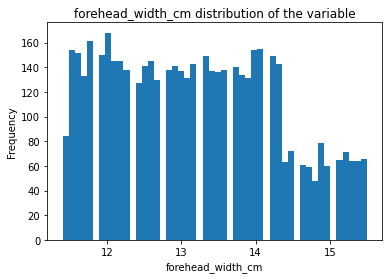

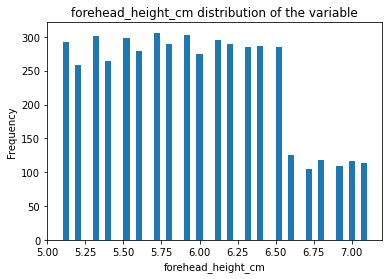

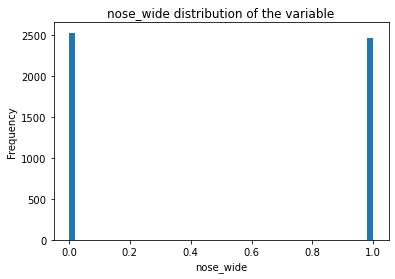

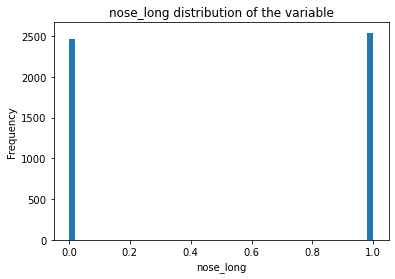

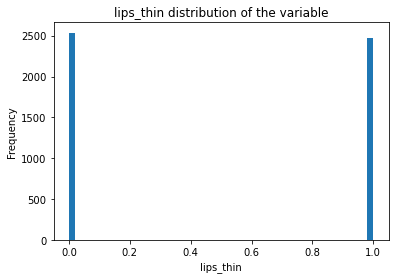

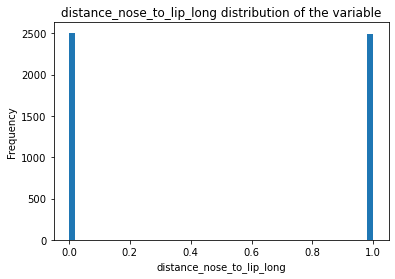

In [8]:
for i in list:
    numeric(i)

Effect of independent variables on dependent variable. But before doing this, we must convert our dependent variable to numeric type. I'm not doing one hot encoding here.I will be glad if you have your feedback on this matter.

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

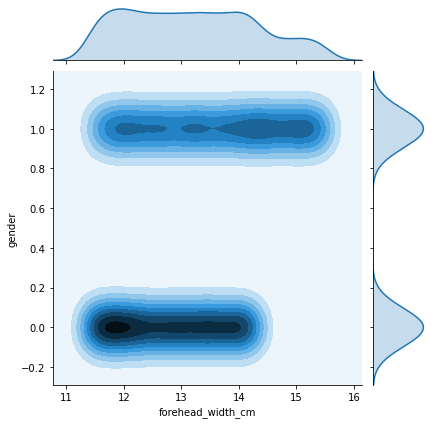

In [10]:
sns.jointplot("forehead_width_cm", "gender", data = df, kind = "kde")

Men's head width is more messy than women and women's fore head width concentrated at 12 cm

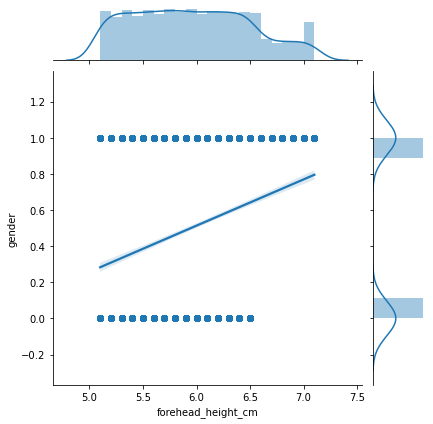

In [11]:
sns.jointplot("forehead_height_cm", "gender", data = df, kind = "reg")

Head height is shorter in women.

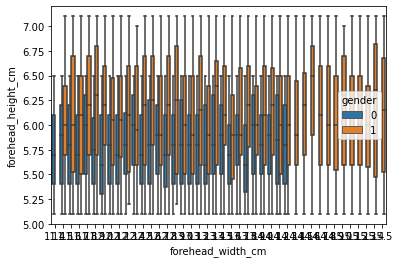

In [12]:
sns.boxplot(x = "forehead_width_cm", y = "forehead_height_cm", data = df, hue = "gender")

Correlation analysis

In [13]:
df_corr = df.corr()

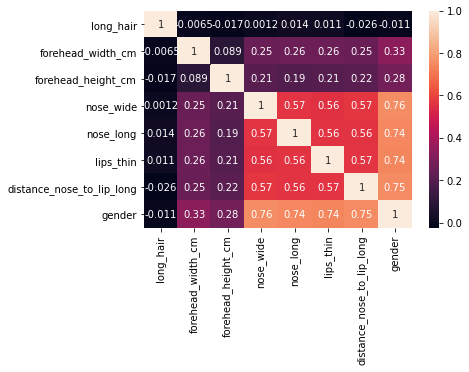

In [14]:
sns.heatmap(df_corr,annot = True)

What we need to understand from this is that if the correlation coefficient is close to -1 or 1, there is a strong relationship between the variables.

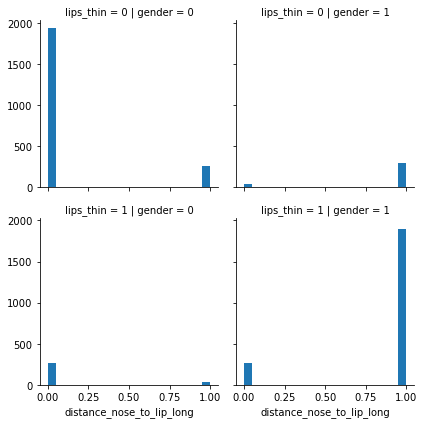

In [15]:
f = sns.FacetGrid(df, row = "lips_thin", col = "gender")
f.map(plt.hist, "distance_nose_to_lip_long", bins = 20)

Outlier detection

In [16]:
def outlier(variable):
    
    sns.boxplot(df[variable])
    plt.show()
      

In [17]:
list1 = ["forehead_width_cm","forehead_height_cm"]

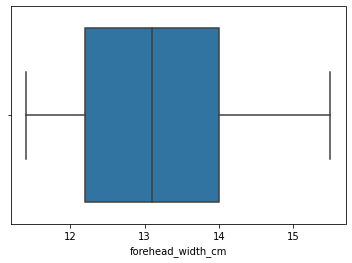

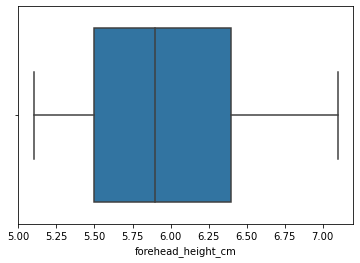

In [18]:
for i in list1:
    outlier(i)

No outlier value in data set

Missing values 

In [19]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

no missing value in data set